In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import h5py as hp

from pic.functions import smooth
from pic.constantes import me

In [2]:

def meanfield(f,key, icut = 0.5):
    """read the HDF5 file f in order to calculate the mean""
    """
    nTimeStep = len([k for k in f.keys()])
    print(nTimeStep)
    groupNames = [k for k in f.keys()][int(nTimeStep*icut):]
    
    groupNames.sort(key=float)

    datasetNames = [k for k in f[groupNames[0]].keys()]
    
    if key not in datasetNames:
        raise NameError('Wrong HDF5 key for dataset !'+key+" is not in "+str(datasetNames) )
    
    for gn in groupNames[:]:
        if gn == groupNames[0]:
            tab = f[gn][key][()]
        else:
            tab += f[gn][key][()] 
        
    return tab/(len(groupNames))


532


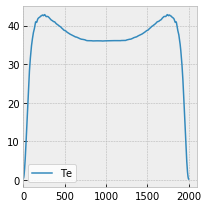

In [8]:
fileName = "cases/no_potential/run1.h5"
#fileName = "cases/inft_sh/runQe.h5"

f = hp.File(fileName,"r")
# print([k for k in f.keys()])
keys = [
       'Te',]

Nlines = 1
Ncol = int(len(keys)/2)+1
with plt.style.context("bmh"):
    fig, axarr = plt.subplots(Nlines,Ncol, figsize=(3,3))

for key,ax in zip(keys, [axarr]):
    vect = meanfield(f,key)
    ax.plot((smooth(vect)), label = key)
    ax.legend()
    #ax.set_ylim(ymin=0)
    ax.set_xlim(xmin=0,
               )
plt.tight_layout()

f.close()
plt.savefig("../Te_Potential_well")

532
532
532
532


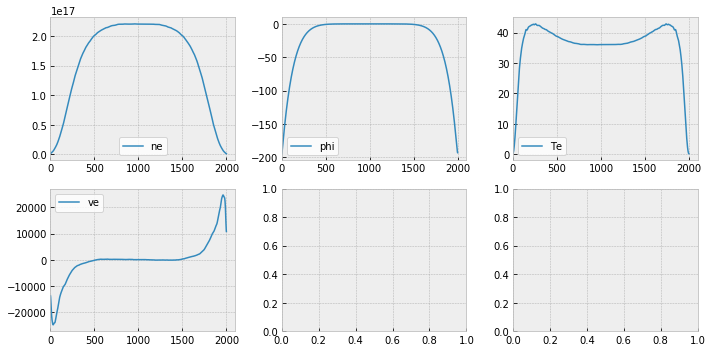

In [11]:
fileName = "cases/inft_sh/runQe.h5"
fileName = "data/run12.h5"
fileName = "cases/no_potential/run1.h5"

f = hp.File(fileName,"r")
# print([k for k in f.keys()])
keys = ['ne',"phi",
       'Te','ve']

Nlines = 2
Ncol = int(len(keys)/2)+1
with plt.style.context("bmh"):
    fig, axarr = plt.subplots(Nlines,Ncol, figsize=(10,5))

for key,ax in zip(keys, axarr.flatten()):
    vect = meanfield(f,key)
    ax.plot((smooth(vect)), label = key)
    ax.legend()
    #ax.set_ylim(ymin=0)
    ax.set_xlim(xmin=0,
               )
plt.tight_layout()

f.close()

In [39]:

try:
    f = hp.File(fileName,"r")

    ni = meanfield(f,"ni")[:-2]
    ne = meanfield(f,"ne")[:-2]
    f.close()

    plt.plot(smooth(smooth(abs(ni - ne))))
    plt.yscale('log')
except:
    print("somthing whent wrong.")

3109
somthing whent wrong.


532
532


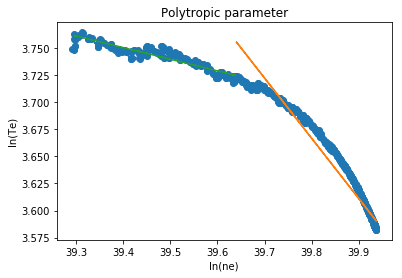

In [14]:
# polytrop
f = hp.File(fileName,"r")
NCutPlot = 250
Te = meanfield(f,"Te")[NCutPlot:-1-NCutPlot]
ne = meanfield(f,"ne")[NCutPlot:-1-NCutPlot]
logTe = np.log(Te)
logNe = np.log(ne)
f.close()

plt.plot(logNe,logTe,'o-')
plt.xlabel("ln(ne)")
plt.ylabel("ln(Te)")
plt.title("Polytropic parameter")

NCutFit = 100
logNeCut = logNe[NCutFit:-1-NCutFit]
logTeCut = logTe[NCutFit:-1-NCutFit]

p = np.polyfit(logNeCut,logTeCut,1)
plt.plot(logNeCut, p[0]*logNeCut+p[1])
#plt.text(39,3,f"n = {p[0]+1:2.2f}")
n = p[0] + 1

NCutFit = 100
logNeCut = logNe[:NCutFit]
logTeCut = logTe[:NCutFit]

p = np.polyfit(logNeCut,logTeCut,1)
plt.plot(logNeCut, p[0]*logNeCut+p[1])
#plt.text(35.5,1,f"n = {p[0]+1:2.2f}");
n2 = p[0] + 1

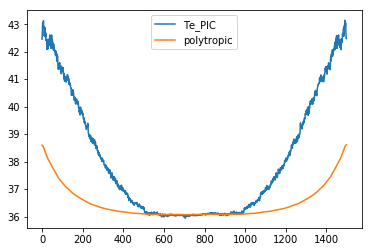

In [15]:
plt.plot(Te, label = "Te_PIC")
Nmid = int(len(Te)/2)
nesmooth = smooth(ne)
TePoly = Te[Nmid]*nesmooth[Nmid]**(1 - n2)/(nesmooth**(1-n2))

plt.plot(TePoly, label = "polytropic")
plt.legend()

3109
3109
3109


/home/tavant/these/code/venv/stand/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


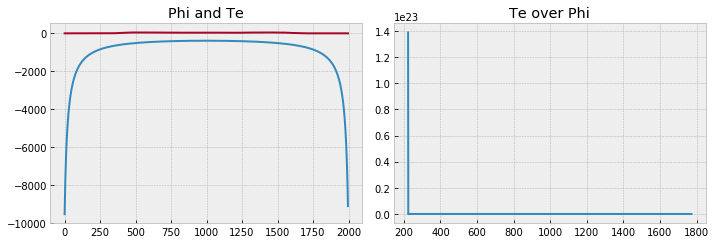

3109



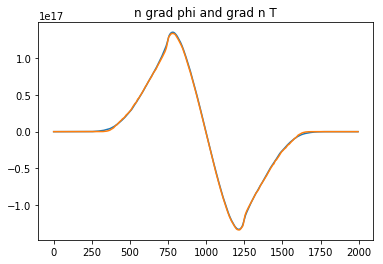

In [48]:
f = hp.File(fileName,"r")
Ncut = 1
Te = meanfield(f,"Te")[Ncut:-1-Ncut]
phi = meanfield(f,"phi")[Ncut:-1-Ncut]
ne = meanfield(f,"ne")[Ncut:-1-Ncut]

with plt.style.context("bmh"):

    plt.figure(figsize=(10,3.5))
    plt.subplot(121)
    plt.plot(phi)
    plt.plot(Te)
    plt.title("Phi and Te")
    plt.subplot(122)
    plt.plot((phi/Te))
    plt.title("Te over Phi")

plt.tight_layout()

plt.show()

ve = meanfield(f,"ve")[Ncut:-1-Ncut]

nT = ne*Te
plt.plot(smooth(ne*np.gradient(phi)))
plt.plot(smooth(np.gradient(nT)))
#plt.plot(smooth(np.gradient(me*ne[:-1]*ve**2)))
plt.title("n grad phi and grad n T")
print("")
f.close()

3109


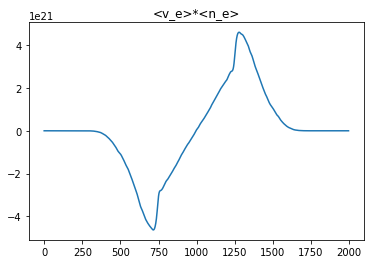

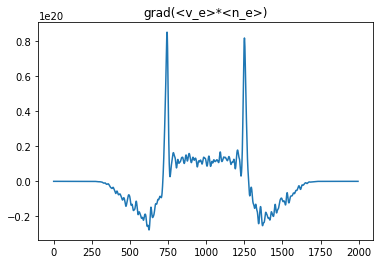

In [49]:
f = hp.File(fileName,"r")
ve = meanfield(f,"ve")[Ncut:-1-Ncut]

plt.title("<v_e>*<n_e>")
plt.plot(smooth(ve*ne))
plt.show()

plt.title("grad(<v_e>*<n_e>)")
plt.plot(smooth(np.gradient(ve*ne)))
f.close()

3109


Text(0,0.5,'Qe')

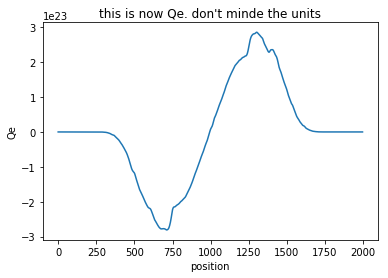

In [50]:
f = hp.File(fileName,"r")
Qe = meanfield(f,"Qe")[Ncut:-1-Ncut]

plt.plot(smooth(Qe*ne))
plt.title("this is now Qe. don't minde the units")
plt.xlabel("position")
plt.ylabel("Qe")